<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/16_Course_3_Week_2_Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000      
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [3]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
-O /tmp/sarcasm.json

--2021-01-07 07:14:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2021-01-07 07:14:29 (107 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [4]:
with open('/tmp/sarcasm.json', 'r') as f :
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore :
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [5]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size :]

training_labels = labels[0:training_size]
testing_labels = labels[training_size :]

print(len(training_sentences))

20000


In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [7]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 30
history = model.fit(
    training_padded,
    training_labels,
    epochs = num_epochs,
    validation_data = (testing_padded, testing_labels),
    verbose = 2
)

Epoch 1/30
625/625 - 4s - loss: 0.6700 - acc: 0.5746 - val_loss: 0.5957 - val_acc: 0.7000
Epoch 2/30
625/625 - 2s - loss: 0.4365 - acc: 0.8267 - val_loss: 0.3836 - val_acc: 0.8430
Epoch 3/30
625/625 - 2s - loss: 0.3113 - acc: 0.8769 - val_loss: 0.3530 - val_acc: 0.8527
Epoch 4/30
625/625 - 2s - loss: 0.2585 - acc: 0.8996 - val_loss: 0.3432 - val_acc: 0.8556
Epoch 5/30
625/625 - 2s - loss: 0.2229 - acc: 0.9131 - val_loss: 0.3458 - val_acc: 0.8568
Epoch 6/30
625/625 - 2s - loss: 0.1950 - acc: 0.9247 - val_loss: 0.3559 - val_acc: 0.8532
Epoch 7/30
625/625 - 2s - loss: 0.1744 - acc: 0.9337 - val_loss: 0.3732 - val_acc: 0.8492
Epoch 8/30
625/625 - 2s - loss: 0.1562 - acc: 0.9427 - val_loss: 0.3790 - val_acc: 0.8526
Epoch 9/30
625/625 - 2s - loss: 0.1388 - acc: 0.9496 - val_loss: 0.3978 - val_acc: 0.8493
Epoch 10/30
625/625 - 2s - loss: 0.1251 - acc: 0.9571 - val_loss: 0.4212 - val_acc: 0.8495
Epoch 11/30
625/625 - 2s - loss: 0.1165 - acc: 0.9587 - val_loss: 0.4800 - val_acc: 0.8344
Epoch 12

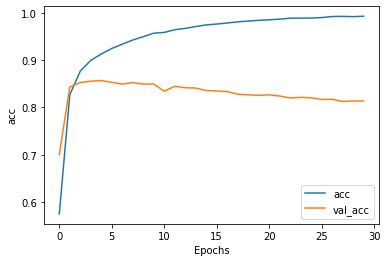

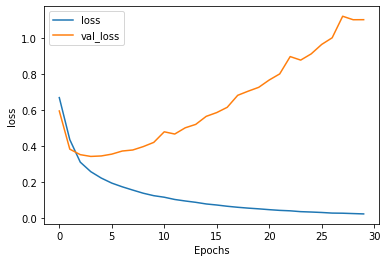

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string) :
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [21]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentences(text) :
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentences(training_padded[0]))
print(training_sentences[0])
print(labels[0])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
former versace store clerk sues over secret 'black code' for minority shoppers
0


In [23]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [25]:
import io

out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for word_num in range(1, vocab_size) :
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + '\n')
  out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')

out_v.close()
out_m.close()

In [26]:
try :
  from google.colab import files
except  ImportError :
  pass
else :
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
sentence = ['granny starting to fear spiders in the garden might be real',
            'game of thrones season finale showing this sunday night']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)
padded = np.array(padded)

print(model.predict(padded))

[[9.6751124e-01]
 [2.1727360e-06]]
